In [1]:
import pandas as pd
dff= pd.read_csv( '/home/yupaporn/codes/USAI/Experiment2.csv')
dff

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,num,FileName,sub_class,views,Path Crop,originalImage,...,U20_Pred2,U21_Pred2,B10_Pred1,B11_Pred1,B12_Pred1_1,B12_Pred1_2,B12_Pred1_3,B10_Pred2,B11_Pred2,B12_Pred2
0,0,0,0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,1,1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB01,AB02,AB01,AB01,AB02,AB02,AB02,AB02,AB01,Normal
2,2,2,2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB01,AB01,AB11,AB02,AB01,AB01,AB01,AB01,AB02,Normal
3,3,3,3,3,4,AB02 P1 C001.JPG,AB02,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB03,AB02,AB082,AB01,AB02,AB02,AB02,AB02,AB01,AB01
4,4,4,4,4,5,AB02 P3-1 C001.JPG,AB02,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB02,AB01,AB01,AB01,AB01,AB01,AB01,AB01,AB01,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,145,145,145,146,P8C193.jpg,Normal,FP-E,/media/tohn/HDD/VISION_dataset/USAI/US images ...,https://irisprodseatraining.blob.core.windows....,...,Normal,Normal,Normal,Normal,Normal,Normal,AB02,Normal,Normal,AB05
146,146,146,146,146,147,P8_Case_007.jpg,Normal,FP-E,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,https://irisprodseatraining.blob.core.windows....,...,Normal,Normal,AB03,Normal,Normal,Normal,Normal,AB01,AB04,AB02
147,147,147,147,147,148,P8_Case_025.jpg,Normal,FP-E,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,https://irisprodseatraining.blob.core.windows....,...,Normal,Normal,AB04,AB05,Normal,Normal,Normal,Normal,AB07,AB081
148,148,148,148,148,149,P8_Case_029.jpg,Normal,FP-E,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,https://irisprodseatraining.blob.core.windows....,...,Normal,Normal,AB083,AB081,Normal,Normal,Normal,Normal,AB04,AB083


In [2]:
a = [0.0,0.1,0.2,0.3,0.4,0.50,0.60,0.70,0.80,0.90,1.0]
# per = ['U10_Pred2','U11_Pred','U20_Pred','U21_Pred2','U30_Pred2','U31_Pred','U40_Pred','U41_Pred2']
per = ['B10_Pred2','B11_Pred1','B12_Pred1_1','U20_Pred','U21_Pred2','U30_Pred2','U31_Pred','U40_Pred','U41_Pred2']
aa = list()
for j in per:
    print('\n',j)
    for i in a:
        probmore=dff[dff['Prob']>=i]
        import numpy as np
        from sklearn.metrics import classification_report,confusion_matrix
        act = probmore['category'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1, 'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
        pred = probmore[j].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1, 'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
        cmat = confusion_matrix(act, pred)
        acc = (100.*np.trace(cmat))/(np.sum(cmat))
        #print(acc)
        Recall = classification_report(act, pred).split()[-9]
        Prec = classification_report(act, pred).split()[-10] 
        correct =len(probmore[probmore['sub_class']==probmore[j]])
        wrong = len(probmore[probmore['sub_class']!=probmore[j]])
        aa.append({'prob':i,'acc':acc,'Prec':Prec,'Recall':Recall,'correct':correct,'wrong':wrong})
        print(i,'classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))
        print('AI ทำนายถูก: ',len(probmore[probmore['sub_class']==probmore[j]]))
        print('AI ทำนายผิด: ',len(probmore[probmore['sub_class']!=probmore[j]]))
df1 = pd.DataFrame(aa)


 B10_Pred2
0.0 classifier accuracy = 74.0%
AI ทำนายถูก:  96
AI ทำนายผิด:  54
0.1 classifier accuracy = 74.0%
AI ทำนายถูก:  96
AI ทำนายผิด:  54
0.2 classifier accuracy = 74.14965986394557%
AI ทำนายถูก:  96
AI ทำนายผิด:  51
0.3 classifier accuracy = 73.72262773722628%
AI ทำนายถูก:  91
AI ทำนายผิด:  46
0.4 classifier accuracy = 73.80952380952381%
AI ทำนายถูก:  86
AI ทำนายผิด:  40
0.5 classifier accuracy = 74.35897435897436%
AI ทำนายถูก:  80
AI ทำนายผิด:  37
0.6 classifier accuracy = 75.0%
AI ทำนายถูก:  78
AI ทำนายผิด:  30
0.7 classifier accuracy = 77.45098039215686%
AI ทำนายถูก:  76
AI ทำนายผิด:  26
0.8 classifier accuracy = 77.41935483870968%
AI ทำนายถูก:  69
AI ทำนายผิด:  24
0.9 classifier accuracy = 75.34246575342466%
AI ทำนายถูก:  55
AI ทำนายผิด:  18
1.0 classifier accuracy = 81.48148148148148%
AI ทำนายถูก:  22
AI ทำนายผิด:  5

 B11_Pred1
0.0 classifier accuracy = 55.333333333333336%
AI ทำนายถูก:  65
AI ทำนายผิด:  85
0.1 classifier accuracy = 55.333333333333336%
AI ทำนายถูก:  65
AI ท

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4 classifier accuracy = 62.698412698412696%
AI ทำนายถูก:  69
AI ทำนายผิด:  57
0.5 classifier accuracy = 62.39316239316239%
AI ทำนายถูก:  63
AI ทำนายผิด:  54
0.6 classifier accuracy = 62.03703703703704%
AI ทำนายถูก:  61
AI ทำนายผิด:  47
0.7 classifier accuracy = 63.72549019607843%
AI ทำนายถูก:  60
AI ทำนายผิด:  42
0.8 classifier accuracy = 66.66666666666667%
AI ทำนายถูก:  57
AI ทำนายผิด:  36
0.9 classifier accuracy = 72.6027397260274%
AI ทำนายถูก:  52
AI ทำนายผิด:  21
1.0 classifier accuracy = 88.88888888888889%
AI ทำนายถูก:  24
AI ทำนายผิด:  3

 U20_Pred
0.0 classifier accuracy = 72.66666666666667%
AI ทำนายถูก:  102
AI ทำนายผิด:  48
0.1 classifier accuracy = 72.66666666666667%
AI ทำนายถูก:  102
AI ทำนายผิด:  48
0.2 classifier accuracy = 72.10884353741497%
AI ทำนายถูก:  102
AI ทำนายผิด:  45
0.3 classifier accuracy = 70.8029197080292%
AI ทำนายถูก:  96
AI ทำนายผิด:  41
0.4 classifier accuracy = 71.42857142857143%
AI ทำนายถูก:  89
AI ทำนายผิด:  37
0.5 classifier accuracy = 71.79487179487

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  87
AI ทำนายผิด:  30
0.6 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  84
AI ทำนายผิด:  24
0.7 classifier accuracy = 80.3921568627451%
AI ทำนายถูก:  82
AI ทำนายผิด:  20
0.8 classifier accuracy = 82.79569892473118%
AI ทำนายถูก:  77
AI ทำนายผิด:  16
0.9 classifier accuracy = 82.1917808219178%
AI ทำนายถูก:  60
AI ทำนายผิด:  13
1.0 classifier accuracy = 85.18518518518519%
AI ทำนายถูก:  23
AI ทำนายผิด:  4

 U30_Pred2
0.0 classifier accuracy = 87.33333333333333%
AI ทำนายถูก:  124
AI ทำนายผิด:  26
0.1 classifier accuracy = 87.33333333333333%
AI ทำนายถูก:  124
AI ทำนายผิด:  26
0.2 classifier accuracy = 87.07482993197279%
AI ทำนายถูก:  122
AI ทำนายผิด:  25
0.3 classifier accuracy = 87.5912408759124%
AI ทำนายถูก:  114
AI ทำนายผิด:  23
0.4 classifier accuracy = 90.47619047619048%
AI ทำนายถูก:  106
AI ทำนายผิด:  20
0.5 classifier accuracy = 89.74358974358974%
AI ทำนายถูก:  102
AI ทำนายผิด:  15
0.6 classifier accuracy = 88.888888888

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
print(len(df1))
df1.head()

99


,prob,acc,Prec,Recall,correct,wrong
0,0.0,74.000000,0.72,0.79,96,54
1,0.1,74.000000,0.72,0.79,96,54
2,0.2,74.149660,0.72,0.80,96,51
3,0.3,73.722628,0.69,0.81,91,46
4,0.4,73.809524,0.67,0.82,86,40


In [4]:
probavg = df1.groupby('prob').mean()
probavg

,acc,correct,wrong
prob,,,
0.0,76.518519,104.111111,45.888889
0.1,76.518519,104.111111,45.888889
0.2,76.417234,103.666667,43.333333
0.3,75.993512,97.333333,39.666667
0.4,76.807760,90.888889,35.111111
0.5,77.207977,85.777778,31.222222
0.6,77.057613,81.888889,26.111111
0.7,78.649237,79.111111,22.888889
0.8,79.689367,73.000000,20.000000


In [ ]:
# y = [76.52,76.52,76.42,75.99,76.81,77.21,77.06,78.65,79.69,80.37,84.77]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis

In [6]:
# df = df1# x axis values 
# # x = df['prob'].tolist()[0:10]
# # corresponding y axis values 
# y10 = df['acc'] .tolist()[0:11]
# y11 = df['acc'] .tolist()[11:22]
# y20 = df['acc'] .tolist()[22:33]
# y21 = df['acc'] .tolist()[33:44]
# y30 = df['acc'] .tolist()[44:55]
# y31 = df['acc'] .tolist()[55:66]
# y40 = df['acc'] .tolist()[66:77]
# y41 = df['acc'] .tolist()[77:88]

In [27]:
# GP = (df['acc'][0:11].reset_index(drop=True) +df['acc'][11:22].reset_index(drop=True))/2
# RES = (df['acc'][22:33].reset_index(drop=True) +df['acc'][33:44].reset_index(drop=True))/2
# NONHB = (df['acc'][44:55].reset_index(drop=True) +df['acc'][55:66].reset_index(drop=True))/2
# HB = (df['acc'][66:77].reset_index(drop=True) +df['acc'][77:88].reset_index(drop=True))/2
# mean = (GP +RES+NONHB+HB)/4

In [7]:
df = df1# x axis values 
# x = df['prob'].tolist()[0:10]
# corresponding y axis values 
y10 = df['acc'] .tolist()[0:11]
y11 = df['acc'] .tolist()[11:22]
y12 = df['acc'] .tolist()[22:33]
y20 = df['acc'] .tolist()[33:44]
y21 = df['acc'] .tolist()[44:55]
y30 = df['acc'] .tolist()[55:66]
y31 = df['acc'] .tolist()[66:77]
y40 = df['acc'] .tolist()[77:88]
y41 = df['acc'] .tolist()[88:99]

In [8]:
GP = (df['acc'][0:11].reset_index(drop=True) +df['acc'][11:22].reset_index(drop=True)+df['acc'][22:33].reset_index(drop=True))/3
RES = (df['acc'][33:44].reset_index(drop=True) +df['acc'][44:55].reset_index(drop=True))/2
NONHB = (df['acc'][55:66].reset_index(drop=True) +df['acc'][66:77].reset_index(drop=True))/2
HB = (df['acc'][77:88].reset_index(drop=True) +df['acc'][88:99].reset_index(drop=True))/2
mean = (GP +RES+NONHB+HB)/4

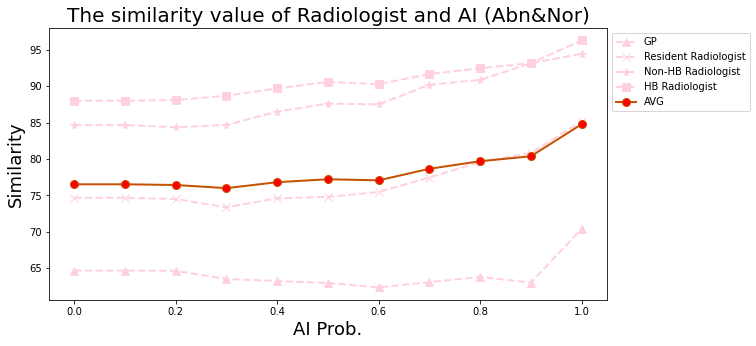

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
# y = [82.5,82.5,82.40,82.12,83.33,83.87,83.57,85.17,86.16,87.33,88.89]
y = [76.52,76.52,76.42,75.99,76.81,77.21,77.06,78.65,79.69,80.37,84.77]
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, GP, color='#ffd1df', linestyle='--', linewidth = 2, marker='^', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, RES, color='#ffd1df', linestyle='--', linewidth = 2, marker='x', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, NONHB, color='#ffd1df', linestyle='--', linewidth = 2, marker='*', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, HB, color='#ffd1df', linestyle='--', linewidth = 2, marker='s', markerfacecolor='#ffd1df', markersize=8)

plt.plot(x, y, color='#c65102', linestyle='-', linewidth = 2, marker='o', markerfacecolor='r', markersize=8)

legend(['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist','AVG'], bbox_to_anchor=(1.,1.))
plt.title('The similarity value of Radiologist and AI (Abn&Nor)',fontsize=20) 
plt.xlabel('AI Prob.',fontsize=18)
plt.ylabel('Similarity',fontsize=18)
show()

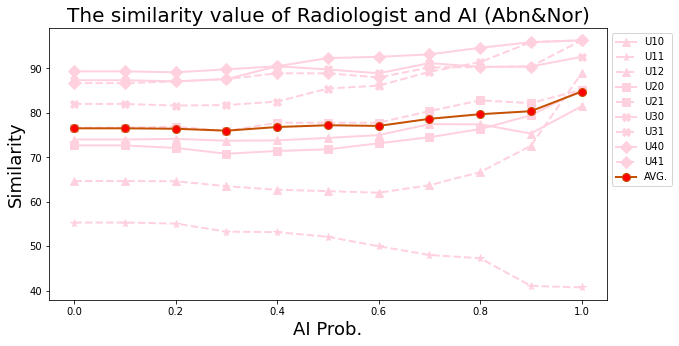

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
# y = [82.5,82.5,82.40,82.12,83.33,83.87,83.57,85.17,86.16,87.33,88.89]
y = [76.52,76.52,76.42,75.99,76.81,77.21,77.06,78.65,79.69,80.37,84.77]
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, y10, color='#ffd1df', linestyle='-', linewidth = 2, marker='^', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y11, color='#ffd1df', linestyle='--', linewidth = 2, marker='*', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y12, color='#ffd1df', linestyle='--', linewidth = 2, marker='^', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y20, color='#ffd1df', linestyle='-', linewidth = 2, marker='s', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y21, color='#ffd1df', linestyle='--', linewidth = 2, marker='s', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y30, color='#ffd1df', linestyle='-', linewidth = 2, marker='X', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y31, color='#ffd1df', linestyle='--', linewidth = 2, marker='X', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y40, color='#ffd1df', linestyle='-', linewidth = 2, marker='D', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y41, color='#ffd1df', linestyle='--', linewidth = 2, marker='D', markerfacecolor='#ffd1df', markersize=8)

plt.plot(x, y, color='#c65102', linestyle='-', linewidth = 2, marker='o', markerfacecolor='r', markersize=8)


legend(['U10','U11','U12','U20','U21','U30','U31','U40','U41','AVG.'], bbox_to_anchor=(1.,1.))
plt.title('The similarity value of Radiologist and AI (Abn&Nor)',fontsize=20) 
plt.xlabel('AI Prob.',fontsize=18)
plt.ylabel('Similarity',fontsize=18)
show()

# Confusion matrix 15AB

In [14]:
import pandas as pd
dff= pd.read_csv( '/home/yupaporn/codes/USAI/Experiment2.csv')
dff.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,num,FileName,sub_class,views,Path Crop,originalImage,...,U20_Pred2,U21_Pred2,B10_Pred1,B11_Pred1,B12_Pred1_1,B12_Pred1_2,B12_Pred1_3,B10_Pred2,B11_Pred2,B12_Pred2
0,0,0,0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,1,1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB01,AB02,AB01,AB01,AB02,AB02,AB02,AB02,AB01,Normal
2,2,2,2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB01,AB01,AB11,AB02,AB01,AB01,AB01,AB01,AB02,Normal
3,3,3,3,3,4,AB02 P1 C001.JPG,AB02,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB03,AB02,AB082,AB01,AB02,AB02,AB02,AB02,AB01,AB01
4,4,4,4,4,5,AB02 P3-1 C001.JPG,AB02,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,...,AB02,AB01,AB01,AB01,AB01,AB01,AB01,AB01,AB01,Normal


In [205]:
# dff.info()

# Assist tool

In [15]:
# per = ['U10_Pred2','U11_Pred','U20_Pred','U21_Pred2','U30_Pred2','U31_Pred','U40_Pred','U41_Pred2']
per = ['B10_Pred2','B11_Pred1','B12_Pred1_1','U20_Pred','U21_Pred2','U30_Pred2','U31_Pred','U40_Pred','U41_Pred2']
aa = list()
probmore=dff
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    a = confusion_matrix(act, pred)
#     print(tn, fp, fn, tp)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
df1

,Person,Con,acc,Prec,Recall,count
0,B10_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.640000,0.43,0.49,150
1,B11_Pred1,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.433333,0.20,0.30,150
2,B12_Pred1_1,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.526667,0.30,0.44,150
3,U20_Pred,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.680000,0.57,0.73,150
4,U21_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.686667,0.40,0.54,150
5,U30_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.826667,0.62,0.66,150
6,U31_Pred,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.786667,0.55,0.76,150
7,U40_Pred,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.866667,0.68,0.73,150
8,U41_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.800000,0.55,0.59,150


1350


Text(0.5, 21.5, 'Predicted label')

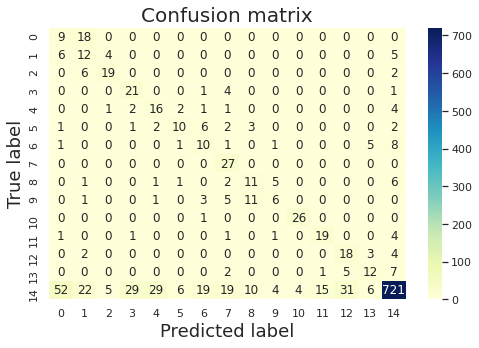

In [17]:
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]+df1.Con[8]
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

144


Text(0.5, 21.5, 'Predicted label')

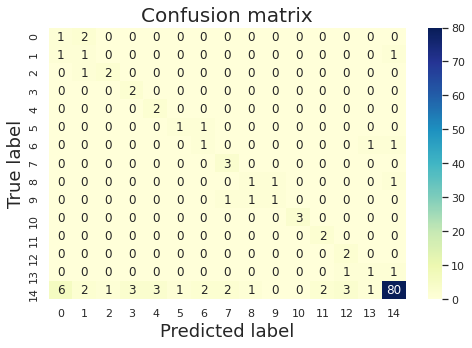

In [18]:
cm =( df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]+df1.Con[8])/9
cm =  np.around(cm)
cm = cm.astype(int)
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Non-Assist

In [21]:
# per = ['U10_Pred','U11_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']
per = ['B10_Pred1','B11_Pred2','B12_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']
aa = list()
probmore=dff
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    a = confusion_matrix(act, pred)
#     print(tn, fp, fn, tp)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

Text(0.5, 21.5, 'Predicted label')

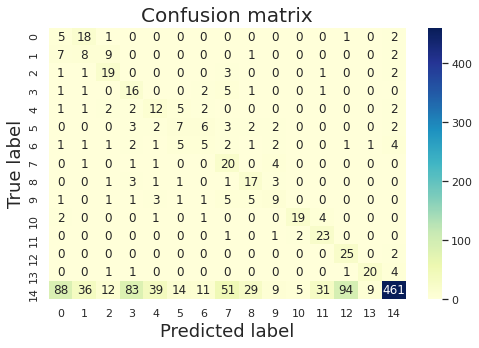

In [22]:
#SUM
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]+df1.Con[8]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

139


Text(0.5, 21.5, 'Predicted label')

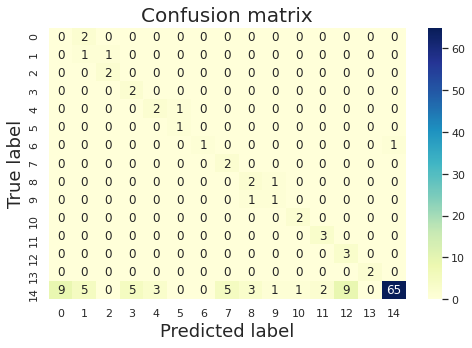

In [212]:
#MEAN
cm =( df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7])/8
cm =  np.around(cm)
cm = cm.astype(int)
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# แยกตาม ระดับ

In [213]:
Easy = dff[dff['tagName0'] == 'Easy']
Hard = dff[dff['tagName0'] == 'Hard']
diff = dff[dff['tagName0'] == 'different']

In [214]:
#Assisit tool All
per = ['U10_Pred2','U11_Pred','U20_Pred','U21_Pred2','U30_Pred2','U31_Pred','U40_Pred','U41_Pred2']
aa = list()
probmore=Easy
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
#     print(tn, fp, fn, tp)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)
df1

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Person,Con,acc,Prec,Recall,count
0,U10_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.660714,0.47,0.54,56
1,U11_Pred,"[[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.767857,0.59,0.70,56
2,U20_Pred,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.696429,0.69,0.78,56
3,U21_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.750000,0.51,0.59,56
4,U30_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.821429,0.67,0.73,56
5,U31_Pred,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.857143,0.71,0.72,56
6,U40_Pred,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.857143,0.70,0.72,56
7,U41_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.839286,0.72,0.68,56


448


Text(0.5, 21.5, 'Predicted label')

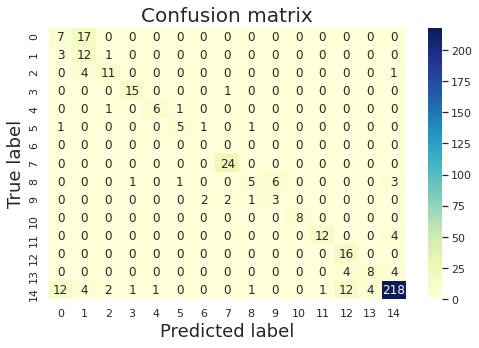

In [217]:
#SUM
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

52


Text(0.5, 21.5, 'Predicted label')

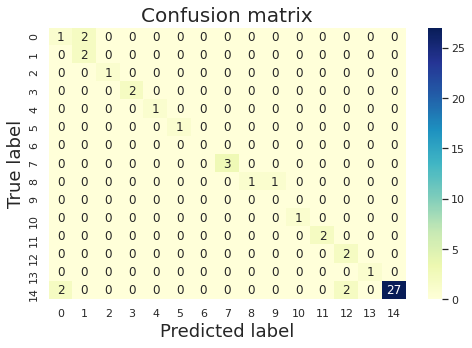

In [216]:
#MEAN
cm =( df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7])/8
cm =  np.around(cm)
cm = cm.astype(int)
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [218]:
#Assisit tool All
per = ['U10_Pred2','U11_Pred','U20_Pred','U21_Pred2','U30_Pred2','U31_Pred','U40_Pred','U41_Pred2']
aa = list()
probmore=Hard
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)
df1

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

,Person,Con,acc,Prec,Recall,count
0,U10_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.454545,0.27,0.30,44
1,U11_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.750000,0.54,0.65,44
2,U20_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.568182,0.48,0.60,44
3,U21_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.613636,0.38,0.48,44
4,U30_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.772727,0.56,0.59,44
5,U31_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.727273,0.61,0.73,44
6,U40_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.727273,0.57,0.63,44
7,U41_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.659091,0.35,0.42,44


352


Text(0.5, 21.5, 'Predicted label')

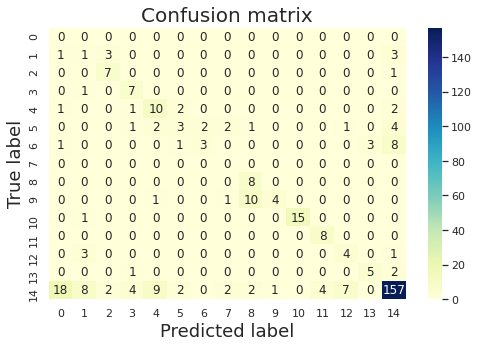

In [219]:
#SUM
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

35


Text(0.5, 21.5, 'Predicted label')

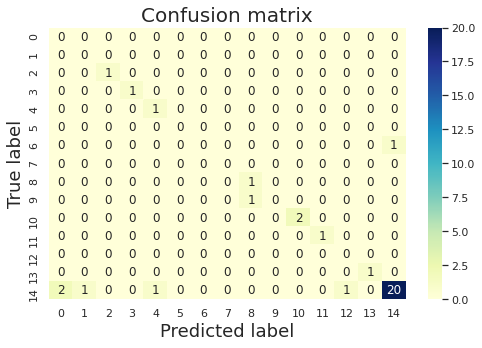

In [220]:
#MEAN
cm =( df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7])/8
cm =  np.around(cm)
cm = cm.astype(int)
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [221]:
#Assisit tool All
per = ['U10_Pred2','U11_Pred','U20_Pred','U21_Pred2','U30_Pred2','U31_Pred','U40_Pred','U41_Pred2']
aa = list()
probmore=diff
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)
df1

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

,Person,Con,acc,Prec,Recall,count
0,U10_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.76,0.12,0.10,50
1,U11_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.94,0.24,0.24,50
2,U20_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.76,0.29,0.25,50
3,U21_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.68,0.09,0.06,50
4,U30_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.88,0.20,0.18,50
5,U31_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.76,0.12,0.10,50
6,U40_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1.00,1.00,1.00,50
7,U41_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.88,0.16,0.15,50


400


Text(0.5, 21.5, 'Predicted label')

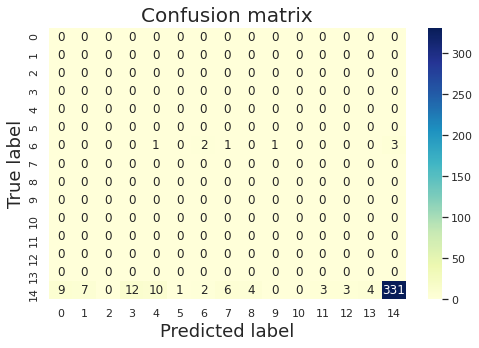

In [222]:
#SUM
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

47


Text(0.5, 21.5, 'Predicted label')

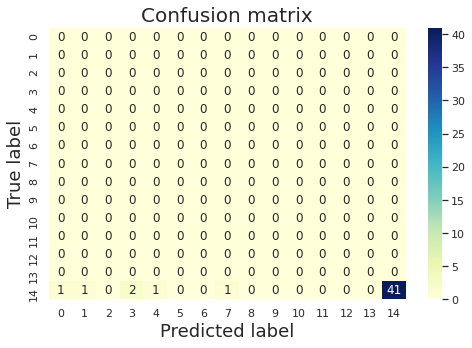

In [223]:
#MEAN
cm =( df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7])/8
cm =  np.around(cm)
cm = cm.astype(int)
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Non-Assist tool

In [224]:
#Assisit tool All
per = ['U10_Pred','U11_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']
aa = list()
probmore=Easy
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
#     print(tn, fp, fn, tp)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)
df1

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

,Person,Con,acc,Prec,Recall,count
0,U10_Pred,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]...",0.321429,0.34,0.46,56
1,U11_Pred2,"[[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.642857,0.40,0.48,56
2,U20_Pred2,"[[2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.589286,0.48,0.69,56
3,U21_Pred,"[[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.607143,0.63,0.76,56
4,U30_Pred,"[[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.803571,0.75,0.82,56
5,U31_Pred2,"[[0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.714286,0.54,0.66,56
6,U40_Pred2,"[[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.785714,0.63,0.69,56
7,U41_Pred,"[[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.517857,0.42,0.65,56


448


Text(0.5, 21.5, 'Predicted label')

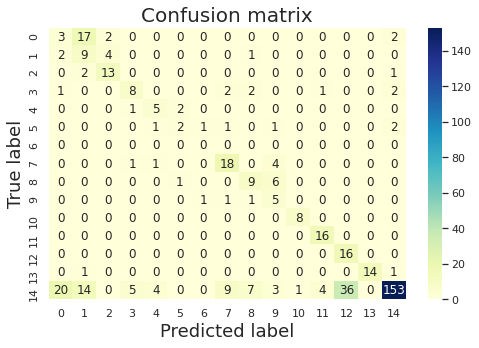

In [225]:
#SUM
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

48


Text(0.5, 21.5, 'Predicted label')

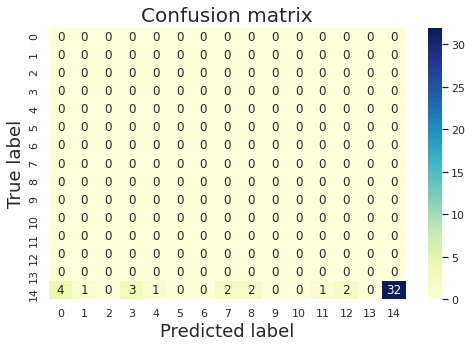

In [233]:
#MEAN
cm =( df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7])/8
cm =  np.round(cm)
cm = cm.astype(int)
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [227]:
#Assisit tool All
per = ['U10_Pred','U11_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']
aa = list()
probmore=Hard
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)
df1

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

,Person,Con,acc,Prec,Recall,count
0,U10_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.204545,0.18,0.25,44
1,U11_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.613636,0.33,0.48,44
2,U20_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.272727,0.32,0.41,44
3,U21_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.522727,0.45,0.63,44
4,U30_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.772727,0.60,0.63,44
5,U31_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.590909,0.49,0.54,44
6,U40_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.681818,0.51,0.59,44
7,U41_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.500000,0.60,0.72,44


352


Text(0.5, 21.5, 'Predicted label')

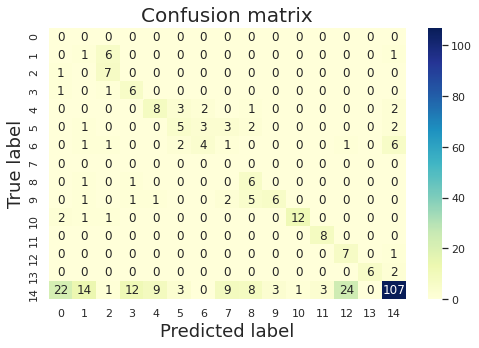

In [228]:
#SUM
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

48


Text(0.5, 21.5, 'Predicted label')

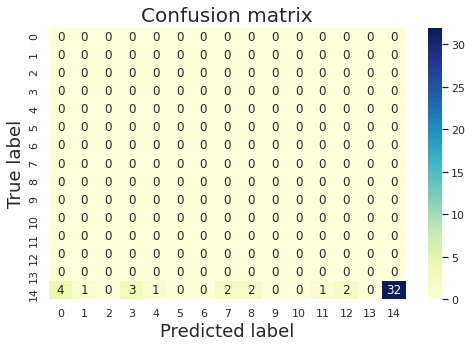

In [234]:
#MEAN
cm =( df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7])/8
cm =  np.round(cm)
cm = cm.astype(int)
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [230]:
#Assisit tool All
per = ['U10_Pred','U11_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']
aa = list()
probmore=diff
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)
df1

/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

,Person,Con,acc,Prec,Recall,count
0,U10_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.56,0.10,0.06,50
1,U11_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.82,0.14,0.12,50
2,U20_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.44,0.14,0.06,50
3,U21_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.48,0.20,0.15,50
4,U30_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.84,0.14,0.12,50
5,U31_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.74,0.12,0.09,50
6,U40_Pred2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.94,0.24,0.24,50
7,U41_Pred,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",0.38,0.11,0.04,50


400


Text(0.5, 21.5, 'Predicted label')

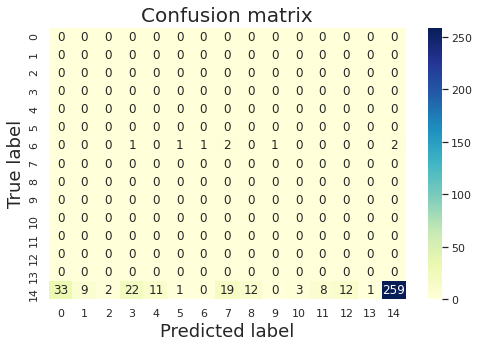

In [231]:
#SUM
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

48


Text(0.5, 21.5, 'Predicted label')

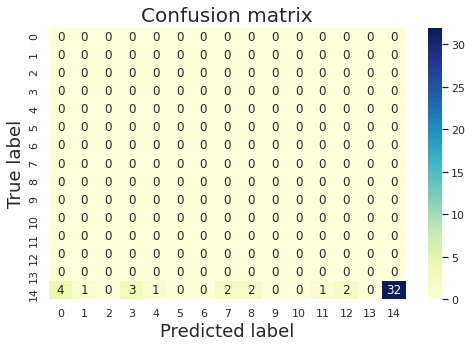

In [235]:
#MEAN
cm =( df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7])/8
cm =  np.round(cm)
cm = cm.astype(int)
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# แยกตาม Abnormal&Normal

In [236]:
import pandas as pd
dff= pd.read_csv( '/home/yupaporn/codes/USAI/Experiment2.csv')
dff

,Unnamed: 0,Unnamed: 0.1,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,...,U40_Pred,U20_Pred,U10_Pred2,U11_Pred2,U30_Pred2,U41_Pred2,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2
0,0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,...,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02
1,1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,...,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02
2,2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,...,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01
3,3,3,4,AB02 P1 C001.JPG,AB02,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,...,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB03,AB02
4,4,4,5,AB02 P3-1 C001.JPG,AB02,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,...,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,145,146,P8C193.jpg,Normal,FP-E,/media/tohn/HDD/VISION_dataset/USAI/US images ...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
146,146,146,147,P8_Case_007.jpg,Normal,FP-E,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,https://irisprodseatraining.blob.core.windows....,Hard,Hard,...,Normal,Normal,AB01,Normal,Normal,Normal,Normal,Normal,Normal,Normal
147,147,147,148,P8_Case_025.jpg,Normal,FP-E,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,https://irisprodseatraining.blob.core.windows....,Hard,Easy,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
148,148,148,149,P8_Case_029.jpg,Normal,FP-E,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,https://irisprodseatraining.blob.core.windows....,Hard,Easy,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis

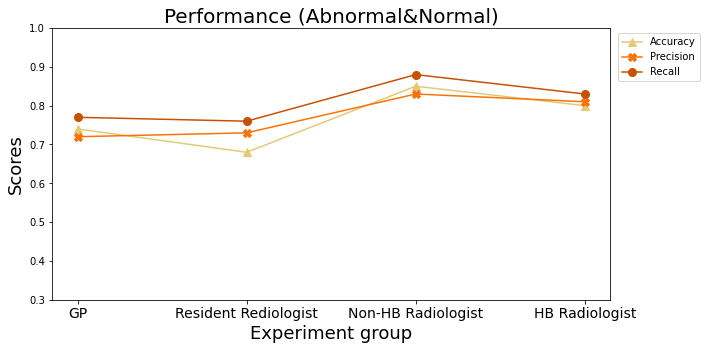

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

a = [0.74,0.68,0.85,0.80]
a1 = [0.72,0.73,0.83,0.81]
a2 = [0.77,0.76,0.88,0.83]
# nohb15 = [0.01,0.01,0.13]
# hb = [0.42,0.27,0.13]
plt.ylim(0.3,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, a, color='#e2ca76', linestyle='-', linewidth = 1.5, marker='^', markerfacecolor='#e2ca76', markersize=8)
plt.plot(x, a1, color='#f97306', linestyle='-', linewidth = 1.5, marker='X', markerfacecolor='#f97306', markersize=8)
plt.plot(x, a2, color='#c65102', linestyle='-', linewidth = 1.5, marker='o', markerfacecolor='#c65102', markersize=8)
# plt.plot(x, nohb15, color='#4e7496',alpha=0.7, linestyle='-', linewidth = 2, marker='s', markerfacecolor='#4e7496', markersize=8)
# plt.plot(x, hb, color='#4e7496', linestyle='-', linewidth = 2, marker='D', markerfacecolor='#4e7496', markersize=8)



legend(['Accuracy', 'Precision','Recall'], bbox_to_anchor=(1.17,1.))
plt.title('Performance (Abnormal&Normal)',fontsize=20) 
plt.xlabel('Experiment group',fontsize=18)
plt.ylabel('Scores',fontsize=18)
ax.set_xticks(x)
labels = ['GP', 'Resident Rediologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=14)

show()

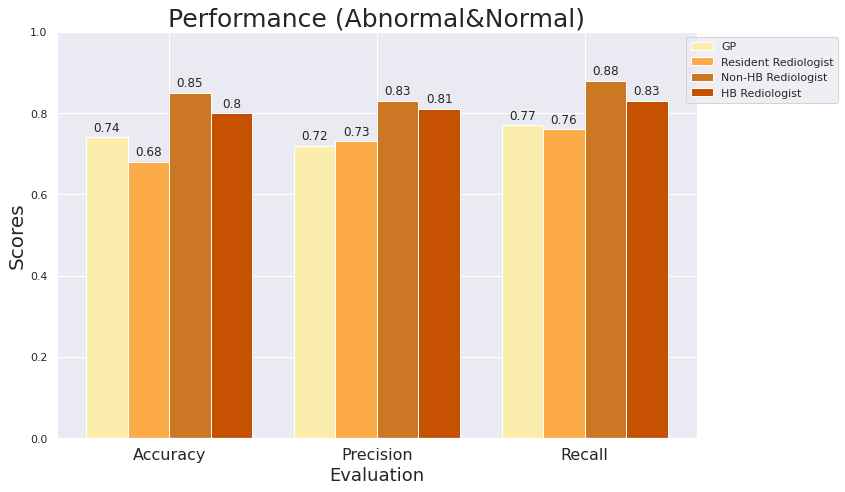

In [27]:
fig, ax = plt.subplots(figsize=(12, 7))

labels = ['Accuracy', 'Precision','Recall']
# acc = [0.74,0.72,0.77]
# prc = [0.68,0.73,0.76]
# re = [0.85,0.83,0.88]
# HB = [0.80,0.81,0.83]
GP = [0.74,0.72,0.77]
Resident = [0.68,0.73,0.76]
NonHB = [0.85,0.83,0.88]
HB = [0.80,0.81,0.83]

# a = [0.74,0.68,0.85,0.80]
# a1 = [0.72,0.73,0.83,0.81]
# a2 = [0.77,0.76,0.88,0.83]

plt.ylim(0,1) 
x = np.arange(0,1.5,0.5)  # the label locations
width = 0.1  # the width of the bars
rects1 = ax.bar(x - 0.15 , GP, width, color='#fbeeac', label='GP')
rects2 = ax.bar(x - 0.05, Resident, width, color='#fdaa48', label='Resident Rediologist')
rects3 = ax.bar(x + 0.05 , NonHB, width, color='#cb7723', label='Non-HB Rediologist')
rects4 = ax.bar(x + 0.15, HB, width, color='#c65102', label='HB Rediologist')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores',fontsize=20)
ax.set_title('Performance (Abnormal&Normal)',fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=16)
plt.xlabel('Evaluation',fontsize=18)
ax.legend( bbox_to_anchor=(1.23,1.))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

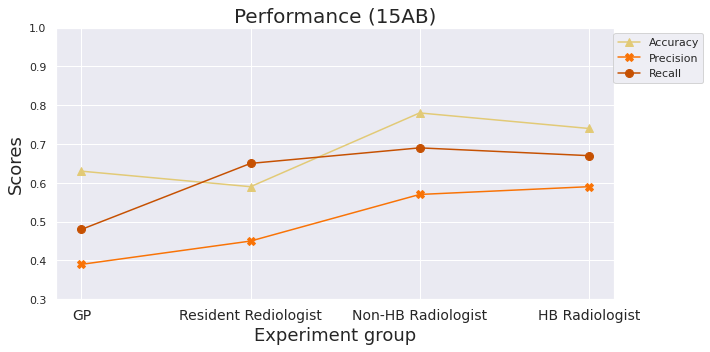

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

a = [0.63,0.59,0.78,0.74]
a1 = [0.39,0.45,0.57,0.59]
a2 = [0.48,0.65,0.69,0.67]
# nohb15 = [0.01,0.01,0.13]
# hb = [0.42,0.27,0.13]
plt.ylim(0.3,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, a, color='#e2ca76', linestyle='-', linewidth = 1.5, marker='^', markerfacecolor='#e2ca76', markersize=8)
plt.plot(x, a1, color='#f97306', linestyle='-', linewidth = 1.5, marker='X', markerfacecolor='#f97306', markersize=8)
plt.plot(x, a2, color='#c65102', linestyle='-', linewidth = 1.5, marker='o', markerfacecolor='#c65102', markersize=8)
# plt.plot(x, nohb15, color='#4e7496',alpha=0.7, linestyle='-', linewidth = 2, marker='s', markerfacecolor='#4e7496', markersize=8)
# plt.plot(x, hb, color='#4e7496', linestyle='-', linewidth = 2, marker='D', markerfacecolor='#4e7496', markersize=8)



legend(['Accuracy', 'Precision','Recall'], bbox_to_anchor=(1.17,1.))
plt.title('Performance (15AB)',fontsize=20) 
plt.xlabel('Experiment group',fontsize=18)
plt.ylabel('Scores',fontsize=18)
ax.set_xticks(x)
labels = ['GP', 'Resident Rediologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=14)

show()

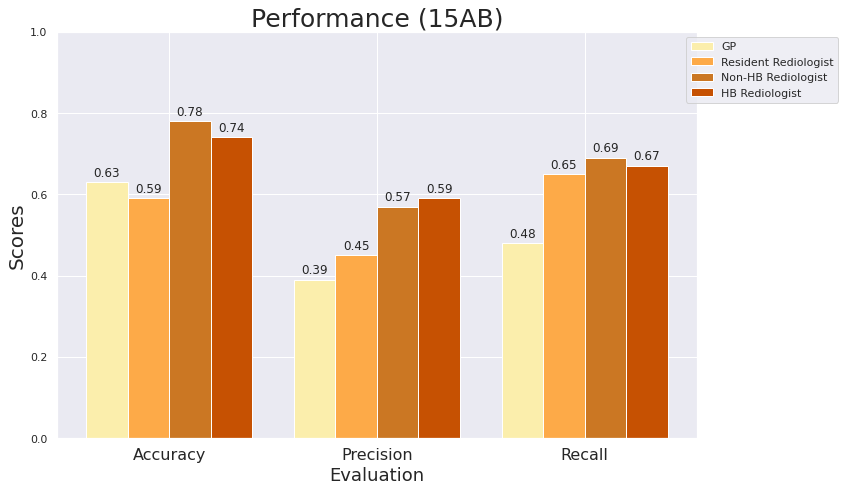

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))

labels = ['Accuracy', 'Precision','Recall']

GP = [0.63,0.39,0.48]
Resident = [0.59,0.45,0.65]
NonHB = [0.78,0.57,0.69]
HB = [0.74,0.59,0.67]

plt.ylim(0,1) 
x = np.arange(0,1.5,0.5)  # the label locations
width = 0.1  # the width of the bars
rects1 = ax.bar(x - 0.15 , GP, width, color='#fbeeac', label='GP')
rects2 = ax.bar(x - 0.05, Resident, width, color='#fdaa48', label='Resident Rediologist')
rects3 = ax.bar(x + 0.05 , NonHB, width, color='#cb7723', label='Non-HB Rediologist')
rects4 = ax.bar(x + 0.15, HB, width, color='#c65102', label='HB Rediologist')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores',fontsize=20)
ax.set_title('Performance (15AB)',fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=16)
plt.xlabel('Evaluation',fontsize=18)
ax.legend( bbox_to_anchor=(1.23,1.))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

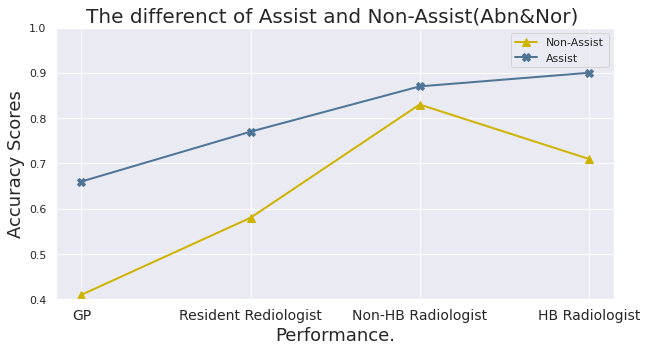

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

Before = [0.66,0.77,0.87,0.90]
After = [0.41,0.58,0.83,0.71]
# nohb15 = [0.01,0.01,0.13]
# hb = [0.42,0.27,0.13]
plt.ylim(0.4,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, After, color='#ceb301', linestyle='-', linewidth = 2, marker='^', markerfacecolor='#ceb301', markersize=8)
plt.plot(x, Before, color='#4e7496', linestyle='-', linewidth = 2, marker='X', markerfacecolor='#4e7496', markersize=8)
# plt.plot(x, nohb15, color='#4e7496',alpha=0.7, linestyle='-', linewidth = 2, marker='s', markerfacecolor='#4e7496', markersize=8)
# plt.plot(x, hb, color='#4e7496', linestyle='-', linewidth = 2, marker='D', markerfacecolor='#4e7496', markersize=8)


legend(['Non-Assist', 'Assist'], bbox_to_anchor=(1.,1.))
plt.title('The differenct of Assist and Non-Assist(Abn&Nor) ',fontsize=20) 
plt.xlabel('Performance.',fontsize=18)
plt.ylabel('Accuracy Scores',fontsize=18)
ax.set_xticks(x)
labels = ['GP', 'Resident Rediologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=14)

show()

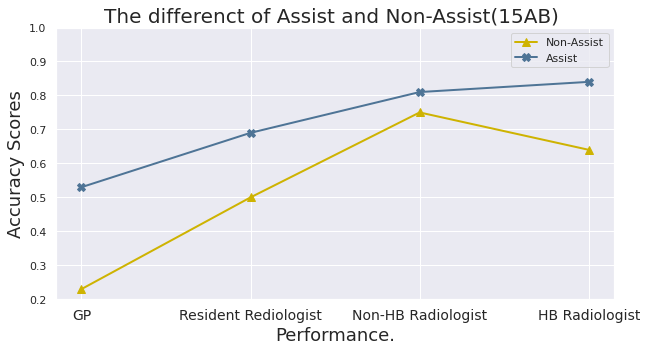

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

Before = [0.53,0.69,0.81,0.84]
After = [0.23,0.50,0.75,0.64]

plt.ylim(0.2,1) 
x = np.arange(0,2,0.5)  # the label locations


plt.plot(x, After, color='#ceb301', linestyle='-', linewidth = 2, marker='^', markerfacecolor='#ceb301', markersize=8)
plt.plot(x, Before, color='#4e7496', linestyle='-', linewidth = 2, marker='X', markerfacecolor='#4e7496', markersize=8)


legend(['Non-Assist', 'Assist'], bbox_to_anchor=(1.,1.))
plt.title('The differenct of Assist and Non-Assist(15AB) ',fontsize=20) 
plt.xlabel('Performance.',fontsize=18)
plt.ylabel('Accuracy Scores',fontsize=18)
ax.set_xticks(x)
labels = ['GP', 'Resident Rediologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=14)

show()

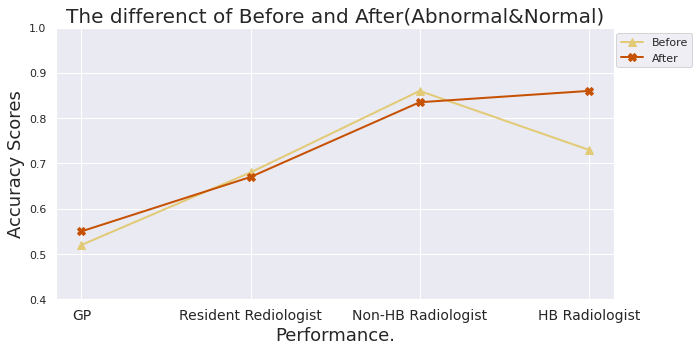

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
Before = [0.52,0.68,0.86,0.73]
After = [0.55,0.67,0.835,0.86]
plt.ylim(0.4,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, Before, color='#e2ca76', linestyle='-', linewidth = 2, marker='^', markerfacecolor='#e2ca76', markersize=8)
plt.plot(x, After, color='#c65102', linestyle='-', linewidth = 2, marker='X', markerfacecolor='#c65102', markersize=8)
# plt.plot(x, nohb15, color='#4e7496',alpha=0.7, linestyle='-', linewidth = 2, marker='s', markerfacecolor='#4e7496', markersize=8)
# plt.plot(x, hb, color='#4e7496', linestyle='-', linewidth = 2, marker='D', markerfacecolor='#4e7496', markersize=8)



legend(['Before', 'After'], bbox_to_anchor=(1.15,1.))
plt.title('The differenct of Before and After(Abnormal&Normal)',fontsize=20) 
plt.xlabel('Performance.',fontsize=18)
plt.ylabel('Accuracy Scores',fontsize=18)
ax.set_xticks(x)
labels = ['GP', 'Resident Rediologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=14)

show()

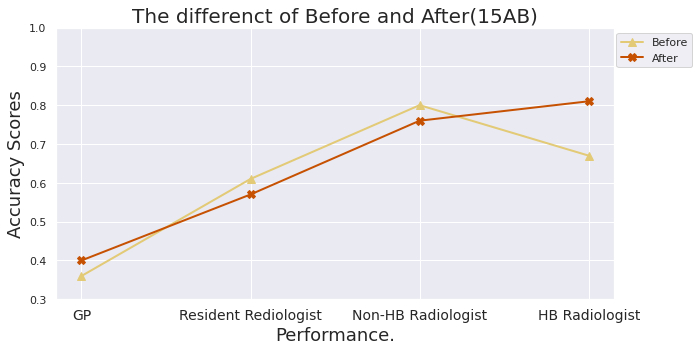

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
Before = [0.36,0.61,0.80,0.67]
After = [0.40,0.57,0.76,0.81]
plt.ylim(0.3,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, Before, color='#e2ca76', linestyle='-', linewidth = 2, marker='^', markerfacecolor='#e2ca76', markersize=8)
plt.plot(x, After, color='#c65102', linestyle='-', linewidth = 2, marker='X', markerfacecolor='#c65102', markersize=8)
# plt.plot(x, nohb15, color='#4e7496',alpha=0.7, linestyle='-', linewidth = 2, marker='s', markerfacecolor='#4e7496', markersize=8)
# plt.plot(x, hb, color='#4e7496', linestyle='-', linewidth = 2, marker='D', markerfacecolor='#4e7496', markersize=8)



legend(['Before', 'After'], bbox_to_anchor=(1.15,1.))
plt.title('The differenct of Before and After(15AB)',fontsize=20) 
plt.xlabel('Performance.',fontsize=18)
plt.ylabel('Accuracy Scores',fontsize=18)
ax.set_xticks(x)
labels = ['GP', 'Resident Rediologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=14)

show()